In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_data = pd.read_csv("data/heart.csv")

### key
* age = Age of the patient in years
* sex = Gender of the patient (0 = male, 1 = female)
* cp = Chest pain type:
    0: Typical angina
    1: Atypical angina
    2: Non-anginal pain
    3: Asymptomatic
* trestbps = Resting blood pressure in mm Hg
* chol = Serum cholesterol in mg/dl
* fbs = Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)
* restecg = Resting electrocardiographic results:
    0: Normal
    1: Having ST-T wave abnormality
    2: Showing probable or definite left ventricular hypertrophy
* thalach = Maximum heart rate achieved during a stress test
* exang = Exercise-induced angina (1 = yes, 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope = Slope of the peak exercise ST segment:
    0: Upsloping
    1: Flat
    2: Downsloping
* ca = Number of major vessels (0-4) colored by fluoroscopy
* thal = Thalium stress test result:
    0: Normal
    1: Fixed defect
    2: Reversible defect
    3: Not described
* target = Heart disease status (0 = no disease, 1 = presence of disease)

## Model Training


In [3]:
# Random seed
np.random.seed(42)

# Split into x/y
x = heart_data.drop("target", axis = 1)
y = heart_data["target"]

# Split the data into training and test sets(model needs two samples to learn)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

# Build machine learning model
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=1000)  

model_RFC.fit(x_train, y_train)


RandomForestClassifier(n_estimators=1000)

## Model Testing

In [4]:
model_RFC.score(x_test, y_test)

0.8688524590163934

### Predictions using machine learning model

In [5]:

# Features neccessary
# obj    = model_RFC.predict(np.array([age, sex, chest pain, restingBloodPressure, chol, fbs, restecg, exang,oldpeak, slope, ca, thalium stress level])

# This is what makes predictions
pred_RFC = model_RFC.predict(np.array(x_test))
test = np.array(y_test)

C:\Users\crodr\OneDrive\Desktop\ml_project\ml_model\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


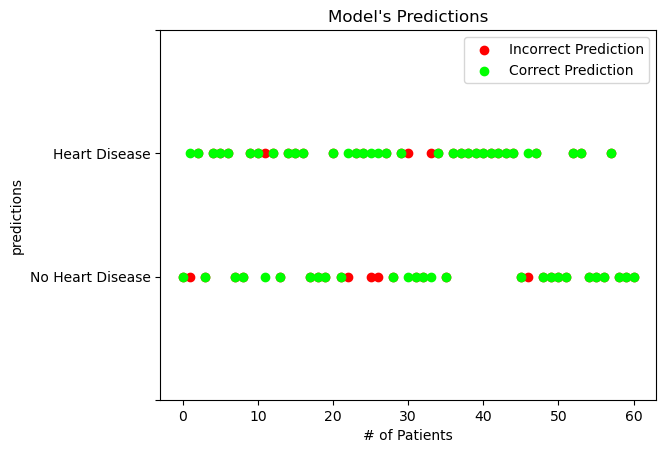

In [6]:
# Create a scatter plot with both arrays
plt.scatter(range(len(test)), test, label='Incorrect Prediction', color='red')
plt.scatter(range(len(pred_RFC)), pred_RFC, label='Correct Prediction', color='lime')

# Set custom y-axis ticks and labels
plt.yticks([-1, 0, 1, 2], ['','No Heart Disease','Heart Disease',''])

# Add labels and legend
plt.xlabel('# of Patients')
plt.ylabel('predictions')
plt.legend()
plt.title("Model's Predictions")

plt.show()

#

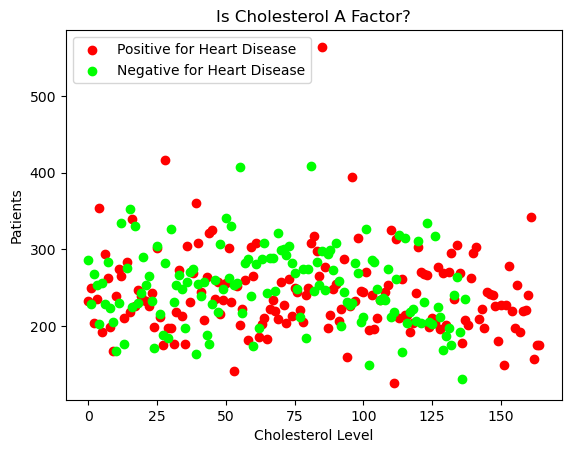

In [7]:
# Separating scatter points by positive and negative targerts
positive_by_age = heart_data.loc[heart_data['target'] == 1]
negative_by_age = heart_data.loc[heart_data['target'] == 0]


# Assuming 'positive_by_age' is your DataFrame with patients having heart disease
x_values_positive = np.arange(len(positive_by_age))
x_values_negative = np.arange(len(negative_by_age))
y_values_negative = negative_by_age['chol']
y_values_positive = positive_by_age['chol']

# Create a scatter plot
plt.scatter(x_values_positive, y_values_positive, color='red', label='Positive for Heart Disease')
plt.scatter

plt.scatter(x_values_negative, y_values_negative, color='lime', label='Negative for Heart Disease')
plt.scatter


# Add labels and title
plt.xlabel('Cholesterol Level')
plt.ylabel('Patients')
plt.title('Is Cholesterol A Factor?')

# Show the plot
plt.legend()
plt.show()


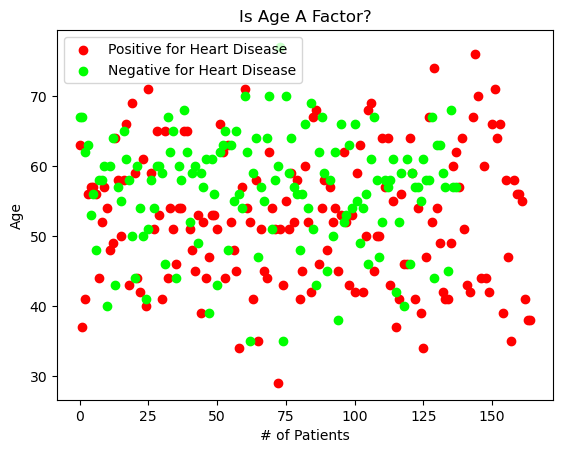

In [8]:

y_values_negative = negative_by_age['age']
y_values_positive = positive_by_age['age']

# Create a scatter plot
plt.scatter(x_values_positive, y_values_positive, color='red', label='Positive for Heart Disease')
plt.scatter

plt.scatter(x_values_negative, y_values_negative, color='lime', label='Negative for Heart Disease')
plt.scatter



# Add labels and title
plt.xlabel('# of Patients')
plt.ylabel('Age')
plt.title('Is Age A Factor?')

# Show the plot
plt.legend()
plt.show()

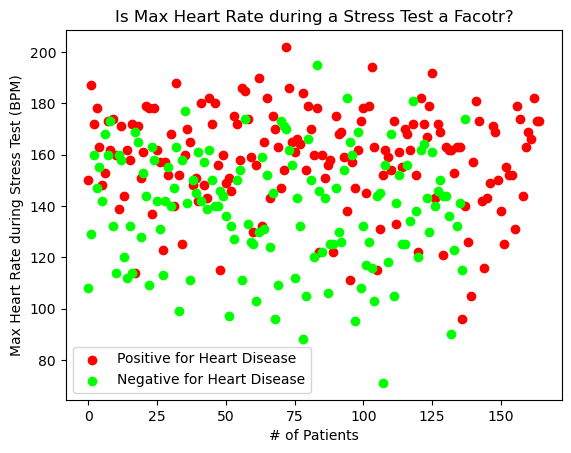

In [9]:

y_values_negative = negative_by_age['thalach']
y_values_positive = positive_by_age['thalach']


# Create a scatter plot
plt.scatter(x_values_positive, y_values_positive, color='red', label='Positive for Heart Disease')
plt.scatter

plt.scatter(x_values_negative, y_values_negative, color='lime', label='Negative for Heart Disease')
plt.scatter


# Add labels and title
plt.xlabel('# of Patients')
plt.ylabel('Max Heart Rate during Stress Test (BPM)')
plt.title('Is Max Heart Rate during a Stress Test a Facotr?')

# Show the plot
plt.legend()
plt.show()

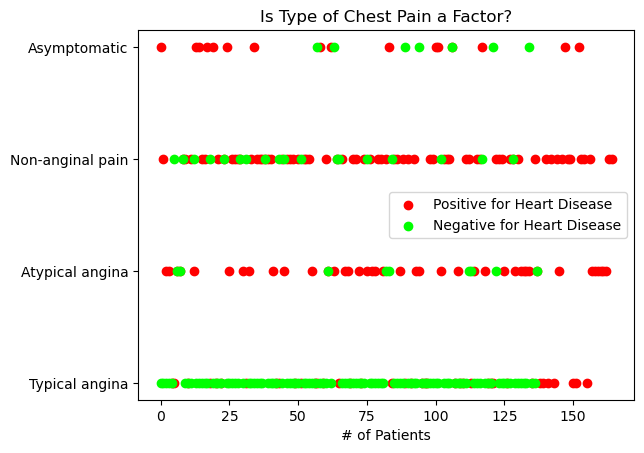

In [10]:

y_values_negative = negative_by_age['cp']
y_values_positive = positive_by_age['cp']

# Create a scatter plot
plt.scatter(x_values_positive, y_values_positive, color='red', label='Positive for Heart Disease')
plt.scatter

plt.scatter(x_values_negative, y_values_negative, color='lime', label='Negative for Heart Disease')
plt.scatter

# Add labels and title
plt.yticks([0, 1, 2, 3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'])
plt.xlabel('# of Patients')
plt.title('Is Type of Chest Pain a Factor?')

# Show the plot
plt.legend()
plt.show()

# Classification model evaluation metrics



In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_data.drop("target", axis = 1)
y = heart_data["target"]

model_RFC = RandomForestClassifier()
cross_val_score = cross_val_score(model_RFC, x, y, cv=5)

In [12]:
np.mean(cross_val_score)


0.8248087431693989

## Accuracy

In [13]:
print(f"{np.mean(cross_val_score) * 100:.2f}%")


82.48%


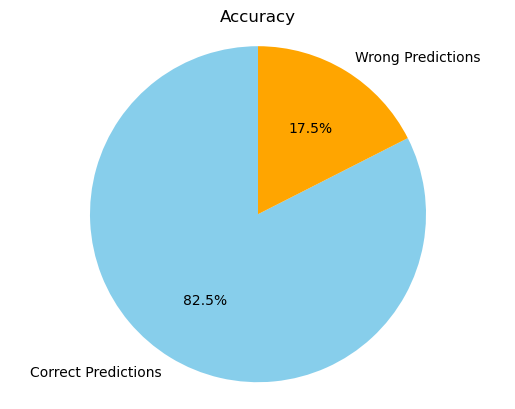

In [14]:
# Create a pie chart
plt.pie([np.mean(cross_val_score), 1 - np.mean(cross_val_score)], labels=['Correct Predictions', 'Wrong Predictions'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])

# Set the circle aspect ratio to be equal, so the pie will be circular
plt.axis('equal')

# Set title
plt.title('Accuracy')

# Show the plot
plt.show()

## Area under the receiver operating characteristic curve (AUC/ROC)
### Area Under Curve (AUC)
### ROC Curve
ROC curves are a comparison of 

In [15]:
from sklearn.metrics import roc_curve

# Fit the classifier
model_RFC.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = model_RFC.predict_proba(x_test)

y_probs[:5]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81]])

In [16]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [17]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

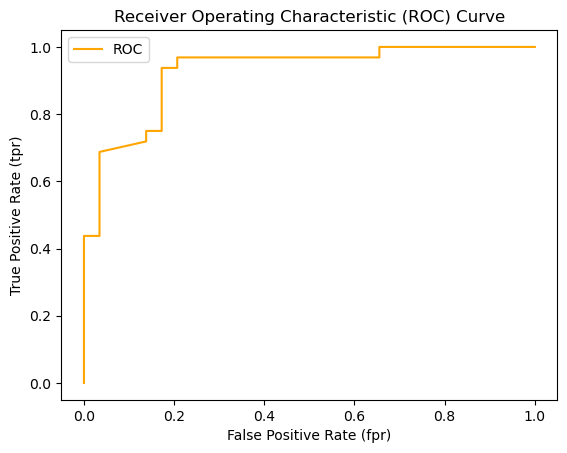

In [18]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr,tpr):

    plt.plot(fpr,tpr, color="orange", label="ROC")
    #plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="guess")

    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    
    plt.show()

plot_roc_curve(fpr,tpr)

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

## Confusion Matrix

Used to compare the labels a model predicts and the actual labels it was suppose to predict.
Lets you know where the model is getting confused.

In [20]:
from sklearn.metrics import confusion_matrix

y_preds = model_RFC.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [21]:
pd.crosstab(y_test, y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"]
           )

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


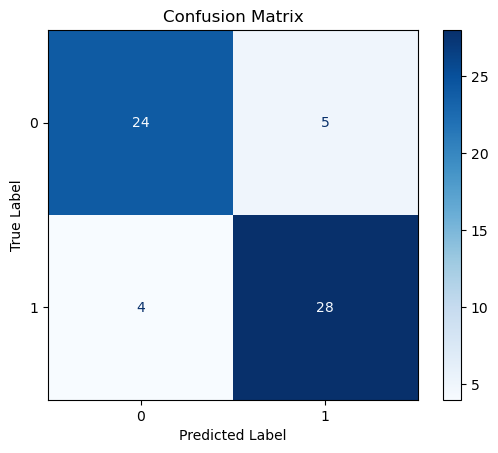

In [22]:
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay

matrix_display = ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds,
                                        cmap='Blues'
                                        )

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

[0][0] = True Positive
[0][1] = False Positive
[1][0] = False Negative
[1][1] = True Negative


In [23]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:

# Features neccessary
# obj    = model_RFC.predict(np.array([age, sex, chest pain, restingBloodPressure, chol, fbs, restecg, exang,oldpeak, slope, ca, thalium stress level])

# This is what makes predictions
age_value = 48
sex_value = 0 
# 0-male 1-female
chest_pain_value = 0 
# 0-3
resting_blood_pressure_value = 130 
# 100-150
chol_value = 120 
# 130-350
fbs_value = 0 
# 0-1 Fasting Blood Sugar 1-above 120 mg/dl 0-below 120 mg/dl
rest_ecg_value = 0 
# 0-1
thalach_value = 100 
# 80-200
exang_value = 0 
# 0-1
oldpeak_value = 1.5 
# 0.0 - 3.5
slope_value = 1 
# 0-2 Slope of the peak exercise ST segment: 0: Upsloping 1: Flat 2: Downsloping
ca_value = 1
# 0-4 Number of major vessels (0-4) colored by fluoroscopy
thal_value = 0 
# 0-3



new_data_point = np.array([age_value, sex_value, chest_pain_value, resting_blood_pressure_value, chol_value, fbs_value, rest_ecg_value, thalach_value, exang_value, oldpeak_value, slope_value, ca_value, thal_value])

# Make a prediction for the new data point
prediction = model_RFC.predict(new_data_point.reshape(1, -1))

# Print the prediction
print("Predicted Class:", prediction)

# Make a prediction for the new data point
predicted_probabilities = model_RFC.predict_proba(new_data_point.reshape(1, -1))

# Print the predicted probabilities for each class
print("Predicted Probabilities:", predicted_probabilities)


Predicted Class: [0]
Predicted Probabilities: [[0.62 0.38]]


C:\Users\crodr\OneDrive\Desktop\ml_project\ml_model\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\crodr\OneDrive\Desktop\ml_project\ml_model\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
# Trained model to make predictions

# Features neccessary
# -----------(np.array([age, sex, chest pain, restingBloodPressure, ])
# model_RFC.predict(np.array([]).reshape(1, -1))

C:\Users\crodr\OneDrive\Desktop\ml_project\ml_model\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by RandomForestClassifier.

In [27]:
import pickle

# Save an existing model to file
pickle.dump(model_RFC, open("model_RFC.pk1", "wb"))

In [ ]:
# load a saved model
loaded_pickle_model = pickle.load(open("models/model_RFC.pk1","rb"))

In [ ]:
# Features neccessary
# obj    = model_RFC.predict(np.array([age, sex, chest pain, restingBloodPressure, chol, fbs, restecg, exang,oldpeak, slope, ca, thalium stress level])

# This is what makes predictions
age_value = 28
sex_value = 0
# 0-male 1-female
chest_pain_value = 0 
# 0-3
resting_blood_pressure_value = 150
# 100-150
chol_value = 100
# 130-350
fbs_value = 0 
# 0-1 Fasting Blood Sugar 1-above 120 mg/dl 0-below 120 mg/dl
rest_ecg_value = 0 
# 0-1
thalach_value = 100 
# 80-200
exang_value = 0 
# 0-1
oldpeak_value = 1.5 
# 0.0 - 3.5
slope_value = 1 
# 0-2 Slope of the peak exercise ST segment: 0: Upsloping 1: Flat 2: Downsloping
ca_value = 4
# 0-4 Number of major vessels (0-4) colored by fluoroscopy
thal_value = 0 
# 0-3



new_data_point = np.array([age_value, sex_value, chest_pain_value, resting_blood_pressure_value, chol_value, fbs_value, rest_ecg_value, thalach_value, exang_value, oldpeak_value, slope_value, ca_value, thal_value])

# Make some predictions 
pickle_y_preds = loaded_pickle_model.predict(new_data_point.reshape(1, -1))

pickle_y_prob = loaded_pickle_model.predict_proba(new_data_point.reshape(1, -1))
pickle_y_prob , pickle_y_preds